In [1]:
import pandas as pd
import seaborn as sns
sam_='data/cell/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt'
sub_='https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt'
exp_='data/cell/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct'

In [2]:
sub=pd.read_table('https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt',index_col=0)
sub['age']=sub['AGE'].str[:2].astype(int)

In [3]:
sam=pd.read_table(sam_,index_col='SAMPID')
wb=sam[sam['SMTSD']=='Whole Blood']
len(wb)

3288

In [4]:
cols=pd.read_table(exp_,skiprows=2,nrows=0)

In [5]:
com=[w for w in wb.index if w in cols]
len(com)

755

In [6]:
%%time 
exp=pd.read_table(exp_,skiprows=2,usecols=list(cols.columns)[:2]+com)
exp.shape

CPU times: user 34 s, sys: 1.96 s, total: 35.9 s
Wall time: 36 s


(56200, 757)

In [161]:
exp.loc[exp[com].mean(1).sort_values().tail().index]

,Name,Description,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6,GTEX-117YW-0005-SM-5NQ8Z,GTEX-1192W-0005-SM-5NQBQ,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
20075,ENSG00000075624.13,ACTB,9360.902446,12400.132855,7724.153335,5612.524237,4876.518884,4441.681088,5945.578088,6703.250178,...,123623,845442,355552,168621,220078,226403,709961,247143,451030,344273
29617,ENSG00000223609.7,HBD,6320.788028,3274.963791,7484.218411,3568.986354,17254.683568,20683.293546,6637.258409,9746.342501,...,948386,383897,459342,535789,349924,281543,81668,777578,505874,222446
3030,ENSG00000163220.10,S100A9,19142.372178,10207.469962,4179.236696,4263.754489,5002.607188,4075.504567,2079.568819,2752.711550,...,204913,1335772,401811,182240,334217,55614,1275744,177796,564218,235277
40778,ENSG00000188536.12,HBA2,22236.296417,12594.406718,47138.510640,15868.243366,69364.228135,72623.392016,50183.486335,69942.905587,...,1514883,1151809,1374896,2121851,1091583,2025727,416708,2427269,1475102,828738
29616,ENSG00000244734.3,HBB,105427.442683,37324.335075,83213.132676,47018.529895,248179.653495,207459.982836,96752.510960,157167.353204,...,15225554,4696583,5850556,7358266,3800894,4123685,1307634,7972857,5305438,2782608


In [154]:
tpm=exp[com]/exp[com].loc[29616]*1000000

In [155]:
tpm.index=exp['Description']

<Axes: xlabel='age', ylabel='ACTB'>

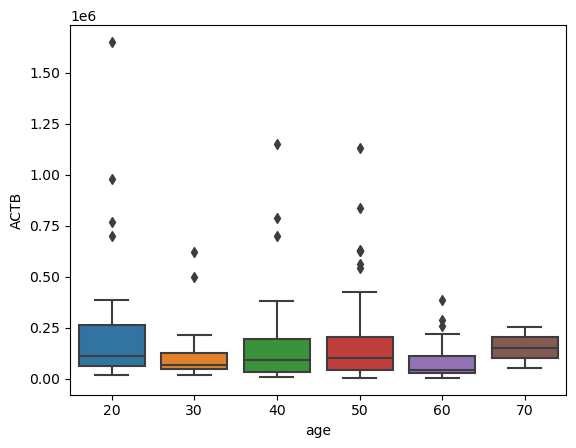

In [166]:
el=tpm.loc[['ACTB']].T
el.index=el.index.str[:9]
dg=sub.merge(el,left_index=True,right_index=True)[[el.columns[0],'age']]
sns.boxplot(dg.drop(['GTEX-WI4N','GTEX-Z93S']),y=dg.columns[0],x='age')

In [165]:
dg.groupby('age').median()

,S100A9
age,
20,124352.773576
30,122518.099346
40,107091.849004
50,117348.750317
60,56399.722998
70,350899.359973


In [73]:
el=exp.T
el.index=el.index.str[:9]
dg=sub.merge(el,left_index=True,right_index=True)

In [90]:
mm=dg.iloc[:,5:].mean(1)

In [92]:
sub.merge(mm.rename('mm'),left_index=True,right_index=True).groupby('age').median()

/local/scratch/moqri/slrmtmp.41907489/ipykernel_6114/3753233874.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub.merge(mm.rename('mm'),left_index=True,right_index=True).groupby('age').median()


,SEX,DTHHRDY,mm
age,,,
20,1.0,0.0,939.417285
30,1.0,0.0,828.519120
40,1.0,0.0,942.947348
50,1.0,0.0,870.636346
60,1.0,0.0,792.938246
70,1.5,0.0,784.088427


In [80]:
mm

GTEX-N7MS     508.691507
GTEX-N7MT     858.985516
GTEX-NFK9     577.519280
GTEX-NPJ7     894.782469
GTEX-NPJ8     559.336358
                ...     
GTEX-ZVTK     623.790868
GTEX-ZVZP     947.084930
GTEX-ZVZQ     820.479813
GTEX-ZXES     967.563942
GTEX-ZXG5    1011.985338
Length: 242, dtype: float64